In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
with open('/content/dataset_sdn.csv') as f:
    df =  pd.read_csv(f, usecols=['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow','Protocol' ,'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps'])
f.close()
df.head()

dt  switch  pktcount  bytecount  ...  rx_bytes  tx_kbps  rx_kbps  tot_kbps
0  11425       1     45304   48294064  ...      3917        0      0.0       0.0
1  11605       1    126395  134737070  ...      3520        0      0.0       0.0
2  11425       1     90333   96294978  ...      1242        0      0.0       0.0
3  11425       1     90333   96294978  ...      1492        0      0.0       0.0
4  11425       1     90333   96294978  ...      3665        0      0.0       0.0

[5 rows x 19 columns]

In [ ]:
df.Protocol.unique()
df['Protocol'] = df['Protocol'].replace('TCP', '0')
df['Protocol'] = df['Protocol'].replace('UDP', '1')
df['Protocol'] = df['Protocol'].replace('ICMP', '2')
df.Protocol.unique()

array(['1', '0', '2'], dtype=object)

In [ ]:
df["rx_kbps"] = df["rx_kbps"].fillna(df["rx_kbps"].mean())

In [ ]:
df["tot_kbps"] = df["tot_kbps"].fillna(df["tot_kbps"].mean())

In [ ]:
scaler = StandardScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale = pd.DataFrame(X_scale, columns=df.columns)
df_scale.head()

dt    switch  pktcount  ...   tx_kbps   rx_kbps  tot_kbps
0 -0.542890 -1.643016 -0.145262  ... -0.412179 -0.489691 -0.640011
1 -0.527862 -1.643016  1.413491  ... -0.412179 -0.489691 -0.640011
2 -0.542890 -1.643016  0.720298  ... -0.412179 -0.489691 -0.640011
3 -0.542890 -1.643016  0.720298  ... -0.412179 -0.489691 -0.640011
4 -0.542890 -1.643016  0.720298  ... -0.412179 -0.489691 -0.640011

[5 rows x 19 columns]

In [ ]:
df_scale2 = df_scale.copy()
kmeans_scale = KMeans(n_clusters=2, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale2)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df_scale2, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

KMeans Scaled Silhouette Score: 0.1961007339513506


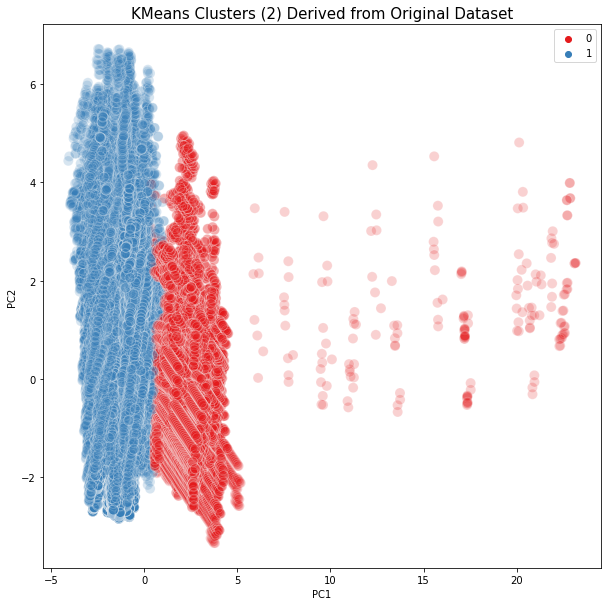

In [ ]:
pca2 = PCA(n_components=2).fit(df_scale2)
pca2d = pca2.transform(df_scale2)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (2) Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [ ]:
pca = PCA(n_components=2)
pca_scale = pca.fit_transform(df_scale)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2'])
print(pca.explained_variance_ratio_)

[0.23682893 0.13383368]


In [ ]:
kmeans_pca_scale = KMeans(n_clusters=2, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.4613677492070967


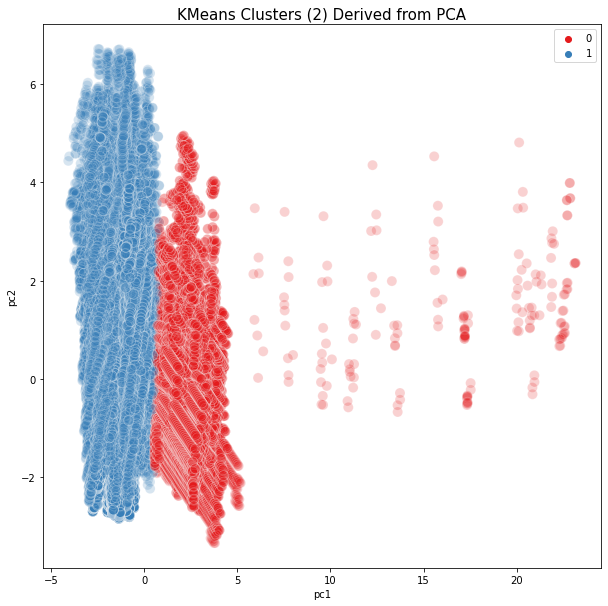

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters (2) Derived from PCA', fontsize=15)
plt.legend()
plt.show()

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 104345 samples in 0.004s...
[t-SNE] Computed neighbors for 104345 samples in 204.130s...
[t-SNE] Computed conditional probabilities for sample 1000 / 104345
[t-SNE] Computed conditional probabilities for sample 2000 / 104345
[t-SNE] Computed conditional probabilities for sample 3000 / 104345
[t-SNE] Computed conditional probabilities for sample 4000 / 104345
[t-SNE] Computed conditional probabilities for sample 5000 / 104345
[t-SNE] Computed conditional probabilities for sample 6000 / 104345
[t-SNE] Computed conditional probabilities for sample 7000 / 104345
[t-SNE] Computed conditional probabilities for sample 8000 / 104345
[t-SNE] Computed conditional probabilities for sample 9000 / 104345
[t-SNE] Computed conditional probabilities for sample 10000 / 104345
[t-SNE] Computed conditional probabilities for sample 11000 / 104345
[t-SNE] Computed conditional probabilities for sample 12000 / 104345
[t-SNE] Computed conditional prob

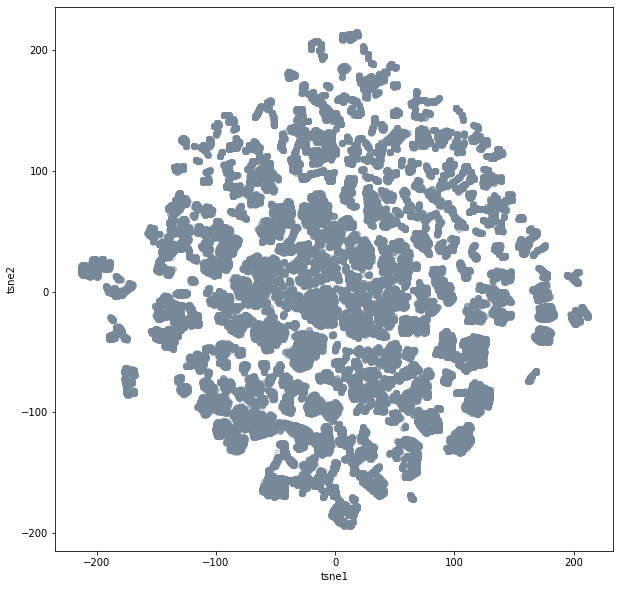

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [ ]:
kmeans_tsne_scale = KMeans(n_clusters=2, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.34130406379699707


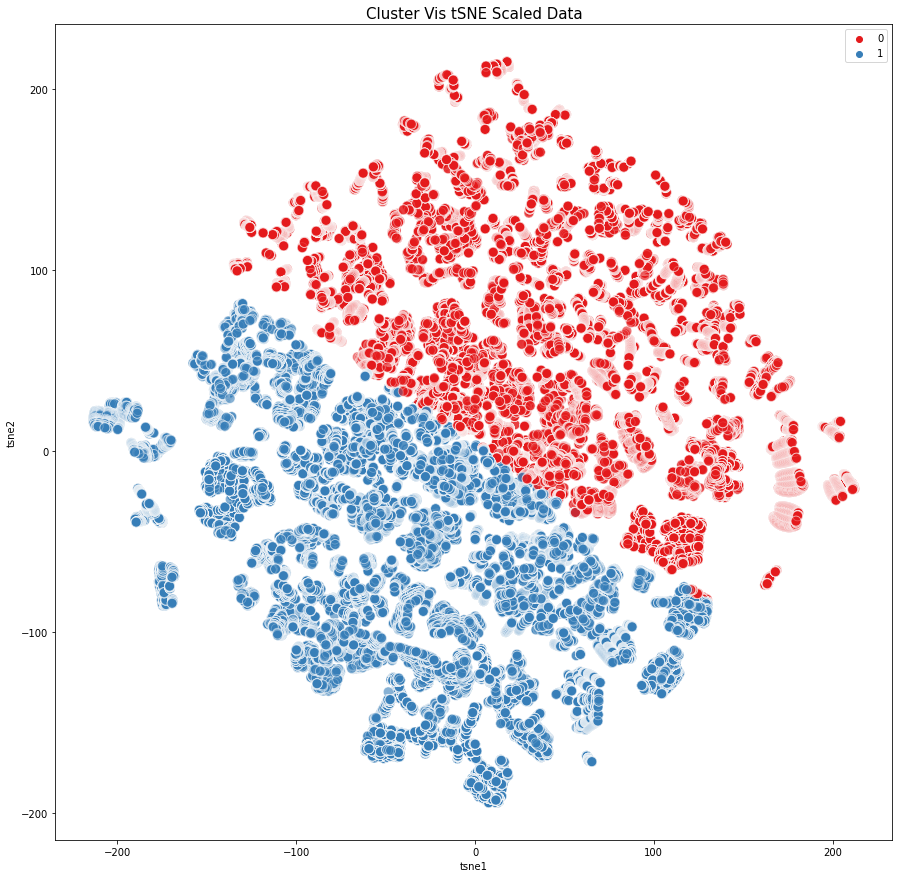

In [ ]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [ ]:
cluster_tsne_profile = pd.merge(df, clusters_tsne_scale['tsne_clusters'], left_index=True, right_index=True )
cluster_pca_profile = pd.merge(df, clusters_pca_scale['pca_clusters'], left_index=True, right_index=True )

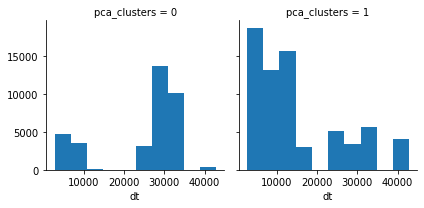

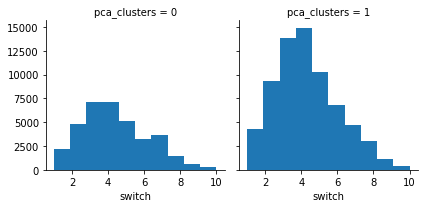

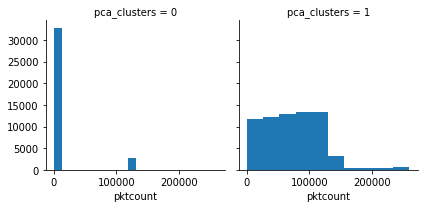

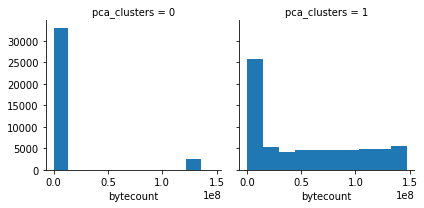

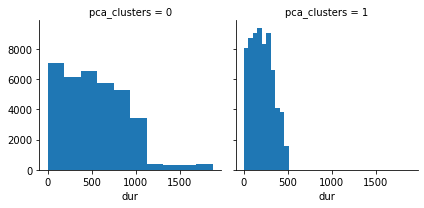

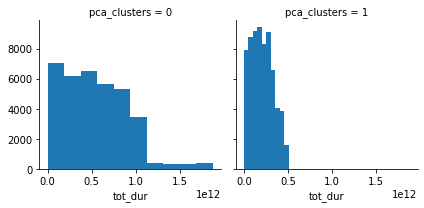

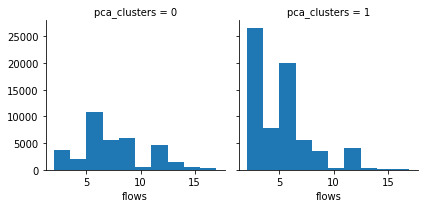

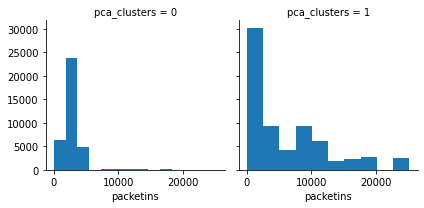

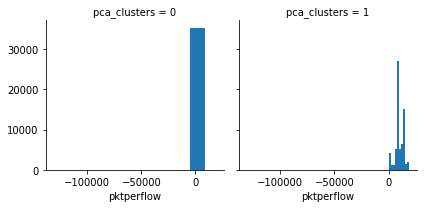

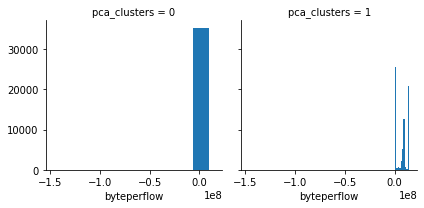

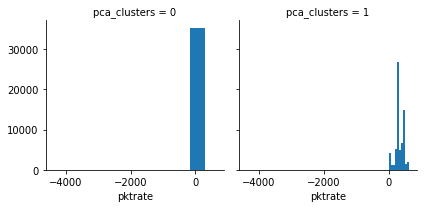

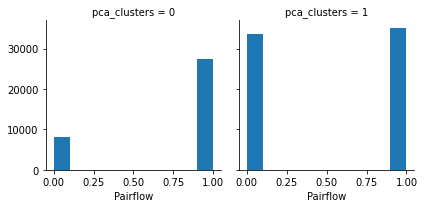

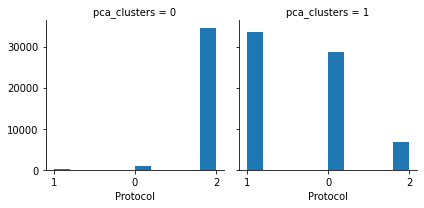

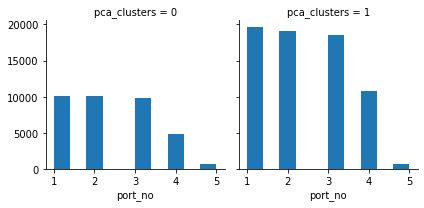

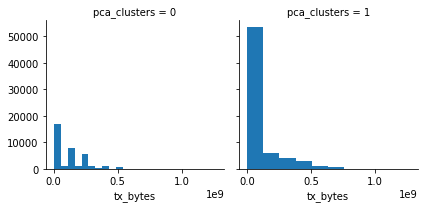

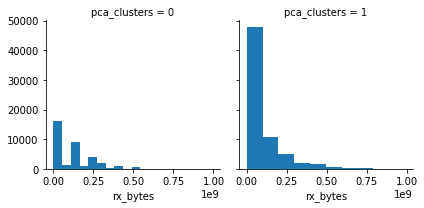

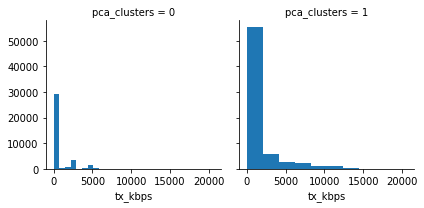

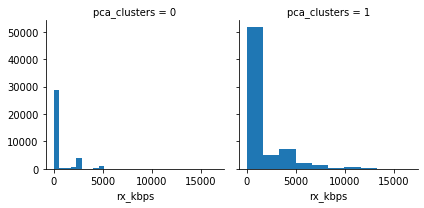

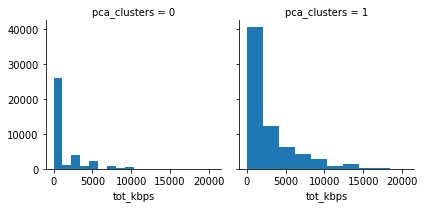

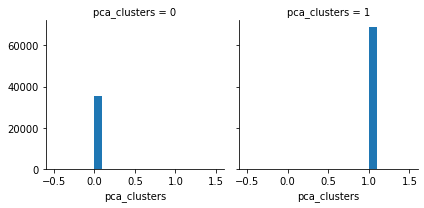

In [ ]:
for c in cluster_pca_profile:
    grid = sns.FacetGrid(cluster_pca_profile, col='pca_clusters')
    grid.map(plt.hist, c)

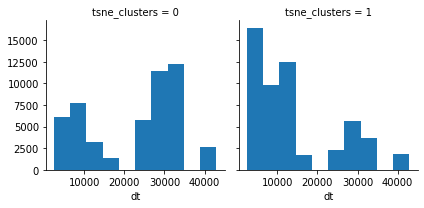

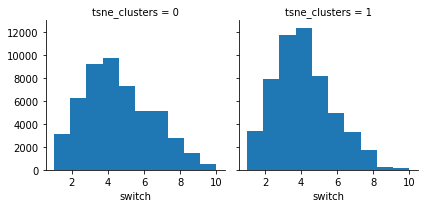

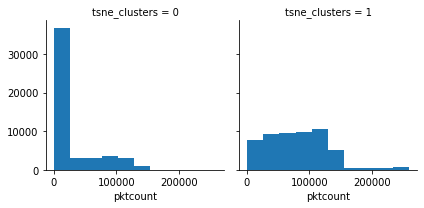

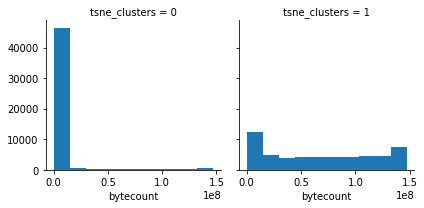

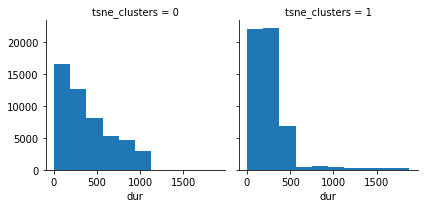

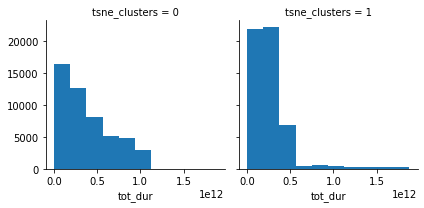

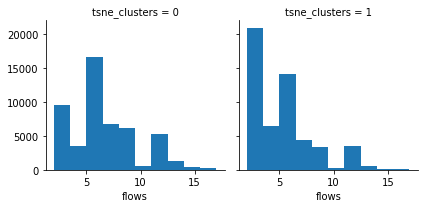

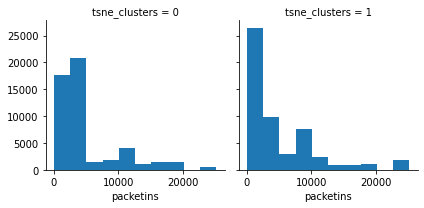

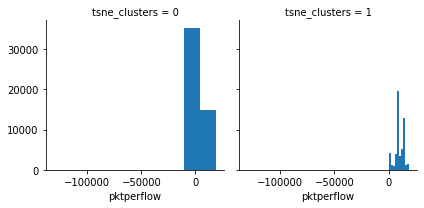

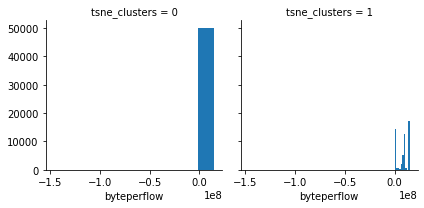

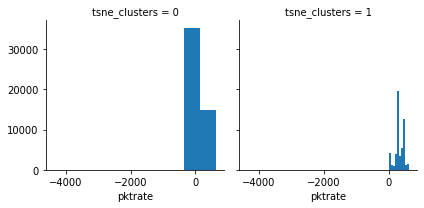

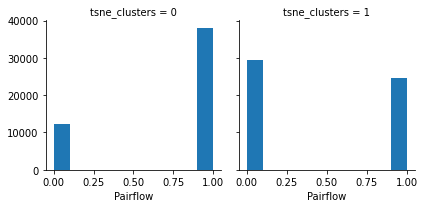

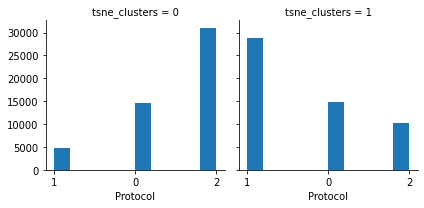

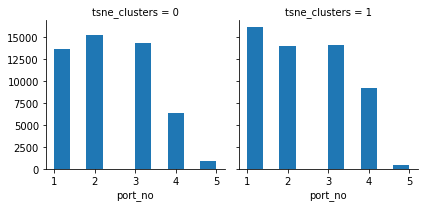

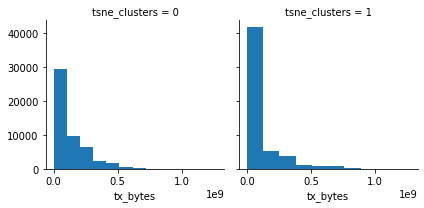

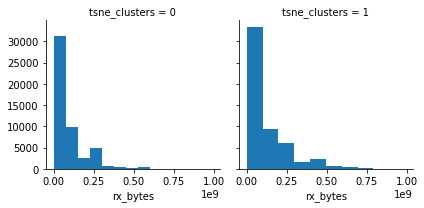

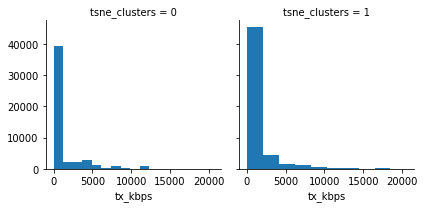

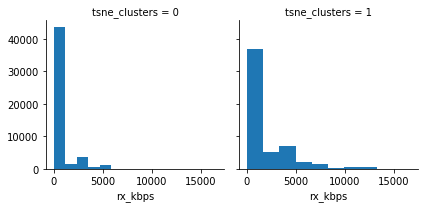

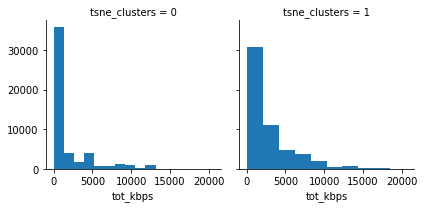

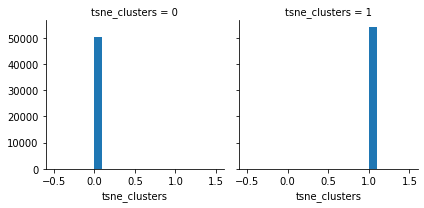

In [ ]:
for c in cluster_tsne_profile:
    grid = sns.FacetGrid(cluster_tsne_profile, col='tsne_clusters')
    grid.map(plt.hist, c)

Text(0.5, 1.0, '(tSNE) Clusters by rx_kbps and tot_kbps ')

<Figure size 1080x720 with 0 Axes>

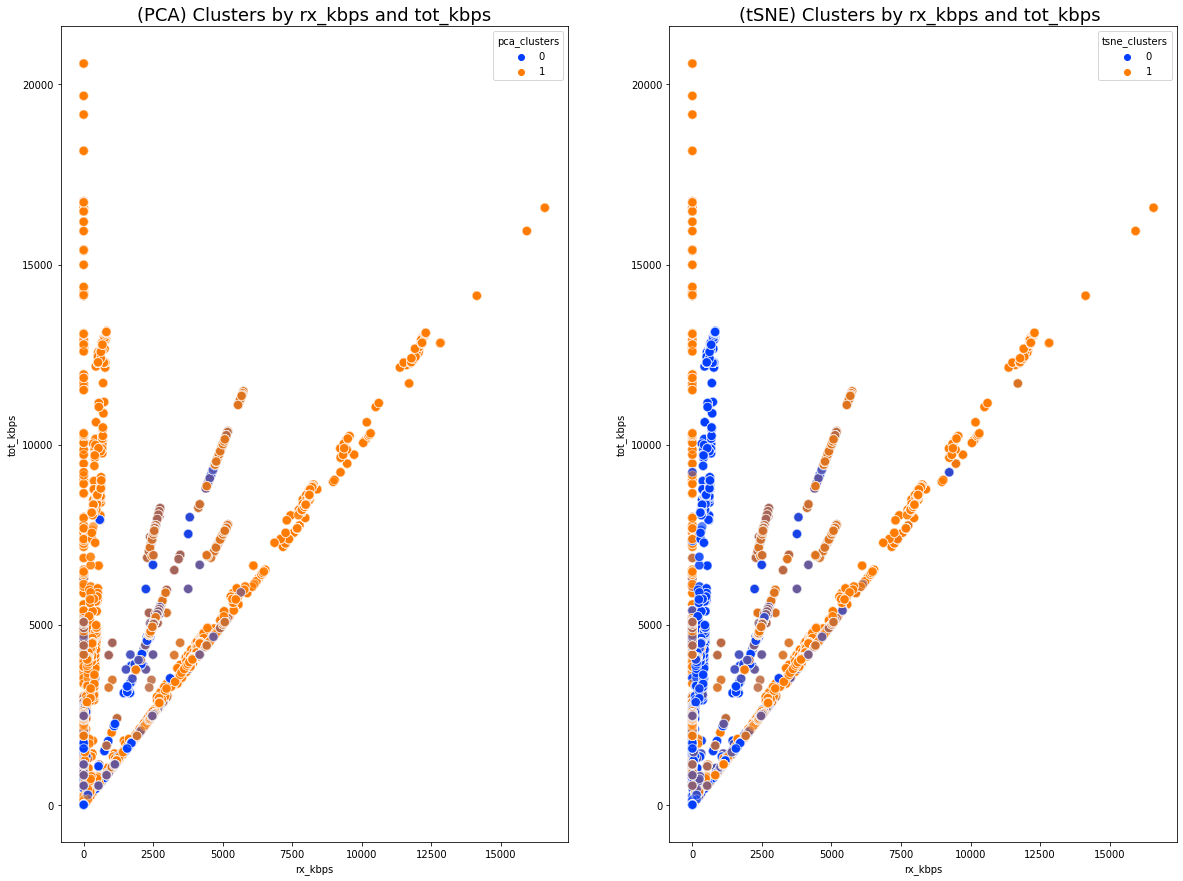

In [ ]:
plt.figure(figsize=(15,10))
fig , (ax1, ax2) = plt.subplots(1,2, figsize=(20,15))
sns.scatterplot(data=cluster_pca_profile, x='rx_kbps', y='tot_kbps', 
                hue='pca_clusters', s=85, alpha=0.4, palette='bright', ax=ax1).set_title(
    '(PCA) Clusters by rx_kbps and tot_kbps',fontsize=18)
sns.scatterplot(data=cluster_tsne_profile, x='rx_kbps', y='tot_kbps', 
                hue='tsne_clusters', s=85, alpha=0.4, palette='bright', ax=ax2).set_title('(tSNE) Clusters by rx_kbps and tot_kbps ', fontsize=18)